# Polls

September 25

Copyright (c) 2014 Rafael Irizarry MIT License

In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
# from pattern import web
import scipy.stats as stats
from scipy.stats import binom
from __future__ import division
import re

pd.set_option('notebook_repr_html', True)
pd.set_option('display.mpl_style', 'default')


# nice defaults for matplotlib
from matplotlib import rcParams

dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4, 0.4, 0.4)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'none'

thep= 0.5534

In [2]:
###############
###############
###############
###############
###############
###############
###############
###############
###############
######## Polls
###############
###############
###############
###############
###############
###############
###############
###############
###############

## Import Dataset

In [61]:
# Import dataset

URL = "http://www.pollster.com/08USPresGEMvO-2.html"

pollsters = pd.read_html(URL, header=0)
df_polls = pollsters[0].copy()
df_polls.head()

,Pollster,Dates,N/Pop,McCain,Obama,Barr,Nader,Other,Undecided,Margin
0,Marist College,11/3/08,804 LV,43,52,-,-,3,2,+9D
1,GWU (Lake/Tarrance),11/2-3/08,400 LV,44,49,-,-,-,7,+5D
2,DailyKos.com (D)/Research 2000,11/1-3/08,1100 LV,46,51,1,1,0,1,+5D
3,IBD/TIPP,11/1-3/08,981 LV,44,52,-,-,4,-,+8D
4,Rasmussen,11/1-3/08,3000 LV,46,52,-,-,-,-,+6D


Let's assume we have a bag with with blue and red balls. The proportions are $p$ and $(1-p)$ respectively.  There are 131 million balls. How can we figure out $p$ ? 

Count them all? 

Take a sample of how many? 100?

Let's try it.

### How to randomly pick or sample `N` `red` or `blue` Balls from large populations

In [9]:
res = [np.random.binomial(1,0.5) for i in np.arange(10)]
colors = ['R', 'B']

print(res)
[colors[val] for val in res]

[1, 1, 1, 0, 1, 0, 0, 0, 0, 0]


['B', 'B', 'B', 'R', 'B', 'R', 'R', 'R', 'R', 'R']

In [20]:
# proportions are $p$ and $(1-p)$ for BLUE and RED respectively.

def pick(N, p):
    """
    Creates a list of N "R" and "B" binomially distributed with a probability p of getting "B"
    """
    result = [np.random.binomial(1,p) for i in np.arange(N)]
    colors = ["R", "B"]
    the_balls = [colors[val] for val in result]
    return the_balls

### Test the function ans sample some balls.

In [23]:
thep= 0.5534

N = 100
p = thep
res = pick(N,p)
round(np.mean([x=='B' for x in res]),2)

0.66000000000000003

We got a number. Is that our guess?

Let's do it again.

In [25]:
res = pick(N,p)
round(np.mean([x=='B' for x in res]),2)

0.45000000000000001

### `Monte Carlo Simulations`  - How does the random variable behave with respect to the `true value`. Here we pick `100` ball at `10,000` times.

In [27]:
B = 10000
avgs=[]
for i in np.arange(B):
    res = pick(N,p)
    avgs.append(round(np.mean([x=='B' for x in res]),2))

In [31]:
avgs[1:5]

[0.58999999999999997,
 0.56000000000000005,
 0.46999999999999997,
 0.54000000000000004]

This average is called a random variable. We only see it once, but it could have been many things. 

### The distribution of many many outcomes is called the probability distribution function
Next, we plot an histogram to figure out the distribution of the balls. The peak gives an idea of the average of blue balls for the whole population.

/Users/RichardAfolabi/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


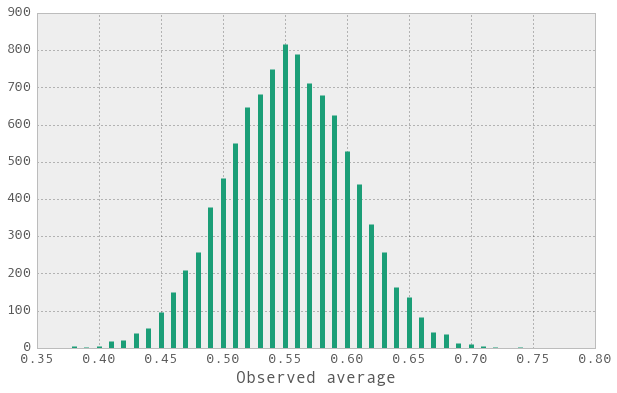

In [33]:
y,x = np.histogram(avgs, bins=np.arange(.35,.76,0.01))
plt.vlines(x[1:], 0, y, lw=5, colors=dark2_colors[0])
plt.xlabel("Observed average")
plt.ylabel("")
plt.show()


Want to guess $p$ now? 

So this histogram tells us the probabilty of any outcome. 

Now instead of saying what proportion, we say what is the chance, because the list of number is hypothetical. 

However, on a computer it is not hypothetical. We should create the list. This is called Monte Carlo simulation. But for this we need to know $p$ and in practice we don't know it, for example for polls.


So this distribution we can actually figure it out. It's called the binomial distribution:
$$\mathbb{P}(X=x)=\binom{N}{x}p^{x}(1-p)^{N-x}$$
This is the probability that exactly $x$ out of $N$ trials are positive, given that each trial has an independent probability $p$ of being positive.

### Instead of running sampling, we could directly use the `binomial formula` to compute prob. Let's compare

/Users/RichardAfolabi/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Users/RichardAfolabi/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


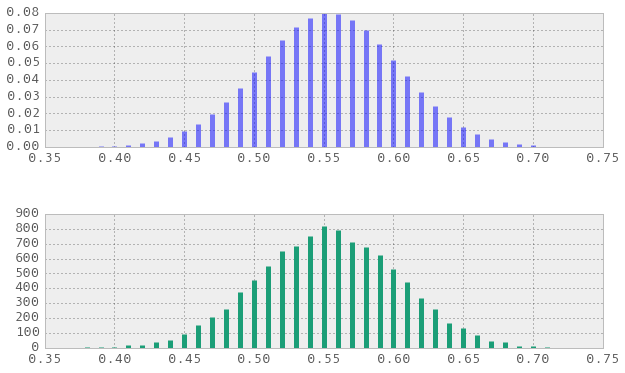

In [45]:
# Select averages between 35 and 71 out of 100.
x2=np.arange(35,71,1)
fig, ax = plt.subplots(2,1)

# For the binomial formulation. We need to supply probability p which most times we do not have.
ax[0].vlines(x2/100, 0, binom.pmf(x2, N, thep), colors='b', lw=5, alpha=0.5)

# For the Monte Carlo Simulation
ax[1].vlines(x[1:], 0, y, lw=5, colors=dark2_colors[0])

ax[0].set_xlim(0.35,0.75)
ax[1].set_xlim(0.35,0.75)
plt.show()

## Approximations to `Normal` Distributions

This particular distribution is well approximated by the normal (bellcurve):
$$\phi(x) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$
We can use a statistical test on our empirical distribution to compare it to a theoretical normal distribution.

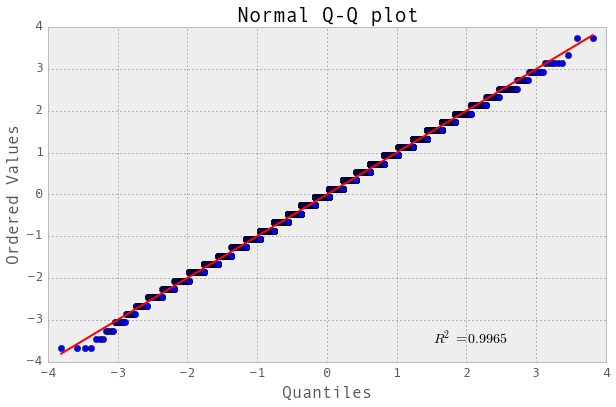

In [46]:
z = (avgs-np.mean(avgs))/np.std(avgs)


stats.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

We might use that later.

The standard deviation of this distribution, is referred to as a standard error. This distinction helps us communicate.

Ok so back to our problem. What is p? How close is our estimate to the actual proportion of balls?

Competition:
What is p? You can give a range. Smallest range wins but if outside eliminated.


Let's look at that distribution again

/Users/RichardAfolabi/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Users/RichardAfolabi/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


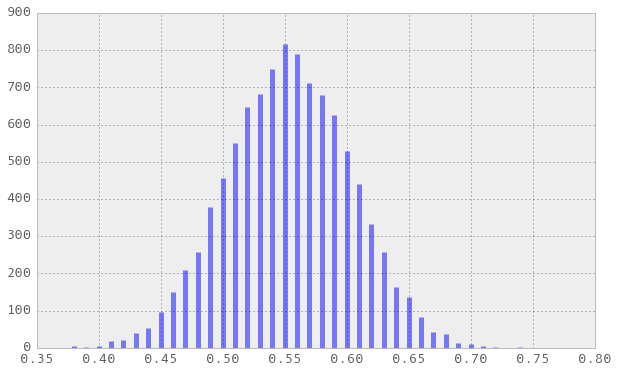

In [47]:
fig, ax = plt.subplots(1, 1)
ax.vlines(x[1:], 0, y, lw=5, colors='b', alpha=0.5)
plt.show()

In [49]:
print("This is the mean:",np.mean(avgs))
print("This is the SE:", np.std(avgs))

This is the mean: 0.553267
This is the SE: 0.050084096388


Let's look at the probabilities:

In [50]:
mean = np.mean(avgs)
sd = np.std(avgs)

##students fill it in:
x = [[.40,.60],[.55,.56], [.551,.559], [.552,.555], [.5541,.5549] ]

/Users/RichardAfolabi/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Users/RichardAfolabi/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


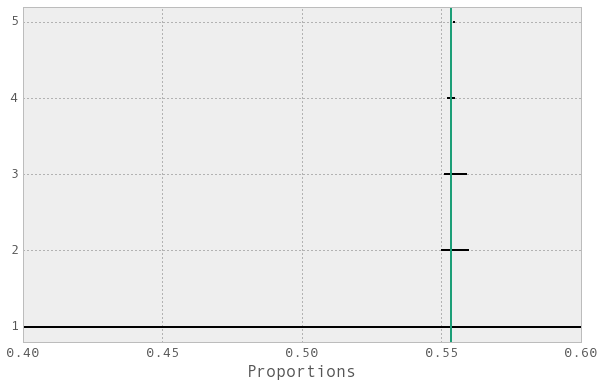

In [52]:
fig, ax = plt.subplots(1, 1)
for i in range(len(x)):
    ax.hlines(i+1, x[i][0], x[i][1])
    ax.vlines(p, 0.8,5.2, alpha=0.8, colors=dark2_colors[0])
plt.ylim(0.8,5.2)
plt.xlabel("Proportions")
plt.show()

95% (it can be any percent) Confidence intervals are random intervals that fall on the true $p$ 95% of the time.

In this example, I use the normal theory instead of the Monte Carlo approach.


In [55]:
def get_prange():
    """
    Returns array of N trials; each entry in the array is three elements list [i, a, b].
    i is either 1 or 0: 1 if a <= p <= b and 0 otherwise. a and b are calculated as mean
    plus/minus 2 standard deviations.
    """
    res = [np.random.binomial(1,p) for i in np.arange(N)]
    avg = np.mean(res)
    res = avg + np.sqrt(avg*(1-avg)/N)*np.array([-3,3])
    res = list(res)
    res = [(res[0]<=p and res[1]>=p)*1]+res
    return res

In [56]:
B = 50
N=1000
cis = np.array([get_prange() for i in np.arange(B)])
cis[:10]

array([[ 1.        ,  0.5028036 ,  0.5971964 ],
       [ 1.        ,  0.50179416,  0.59620584],
       [ 1.        ,  0.50987507,  0.60412493],
       [ 1.        ,  0.51594387,  0.61005613],
       [ 1.        ,  0.47561605,  0.57038395],
       [ 1.        ,  0.50482306,  0.59917694],
       [ 1.        ,  0.52506021,  0.61893979],
       [ 1.        ,  0.52201967,  0.61598033],
       [ 1.        ,  0.4726038 ,  0.5673962 ],
       [ 1.        ,  0.50381323,  0.59818677]])

In [57]:
colors = [dark2_colors[1], dark2_colors[0]]
cols = [colors[int(i)] for i in cis[:,0]]
cis = cis[:,1:3]

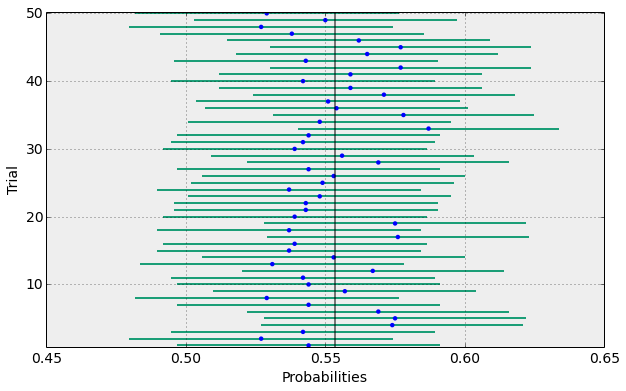

In [131]:
fig, ax = plt.subplots(1, 1)
for i in range(len(cis)):
    ax.hlines(i+1, cis[i][0], cis[i][1], color=cols[i])
    ax.scatter(np.mean(cis[i,:]),i+1, zorder = 2)
ax.vlines(p, 0.8,B+0.2, alpha=0.5)
plt.ylim(0.8,B+0.2)
plt.xlabel("Probabilities")
plt.ylabel("Trial")
plt.show()

## Back to the polls

There are undecided and third party candidates. But what do we care about?

In [67]:
#convert to number
Obama = np.array([float(a) for a in df_polls["Obama"].values])
McCain = np.array([float(a) for a in df_polls["McCain"].values])
df_polls['diff']= Obama - McCain
df_polls.head(3)

,Pollster,Dates,N/Pop,McCain,Obama,Barr,Nader,Other,Undecided,Margin,diff
0,Marist College,11/3/08,804 LV,43,52,-,-,3,2,+9D,9
1,GWU (Lake/Tarrance),11/2-3/08,400 LV,44,49,-,-,-,7,+5D,5
2,DailyKos.com (D)/Research 2000,11/1-3/08,1100 LV,46,51,1,1,0,1,+5D,5


Let's extract day from the day it gives us:

In [69]:
#extract the year
year = [my_str.split("/")[-1] for my_str in df_polls["Dates"].values]
year = [(a=='08')*1 for a in year]
full_year = ["2007", "2008"]
year = [full_year[i] for i in year]


In [72]:
#extract day
dates = df_polls["Dates"].values
day = [my_str.split("-")[0] for my_str in dates]
day = [d[0]+"/"+d[1] for d in [a.split("/") for a in day]]
day = [day[i]+"/"+year[i] for i in np.arange(len(day))]
day = [(pd.to_datetime(a)-pd.to_datetime("11/4/2008")).days for a in day]
df_polls["day"] = day

/Users/RichardAfolabi/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


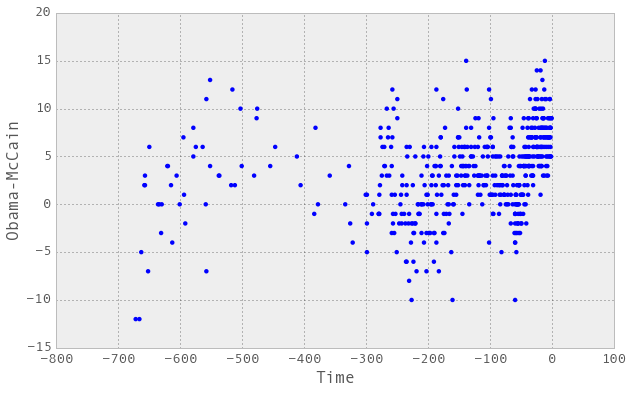

In [73]:
plt.scatter(df_polls["day"], df_polls["diff"])
plt.ylabel("Obama-McCain")
plt.xlabel("Time")
plt.show()

Lets get rid of everything more than 30 days left.

/Users/RichardAfolabi/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


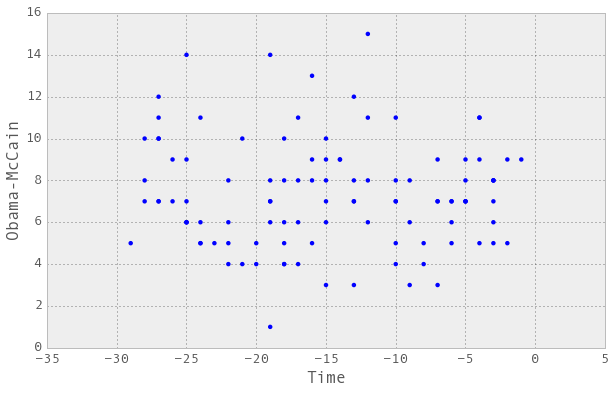

In [78]:
df_polls=df_polls[df_polls["day"]>-30]
plt.scatter(df["day"], df["diff"])
plt.ylabel("Obama-McCain")
plt.xlabel("Time")
# plt.show()

Now let's do it by pollster

/Users/RichardAfolabi/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


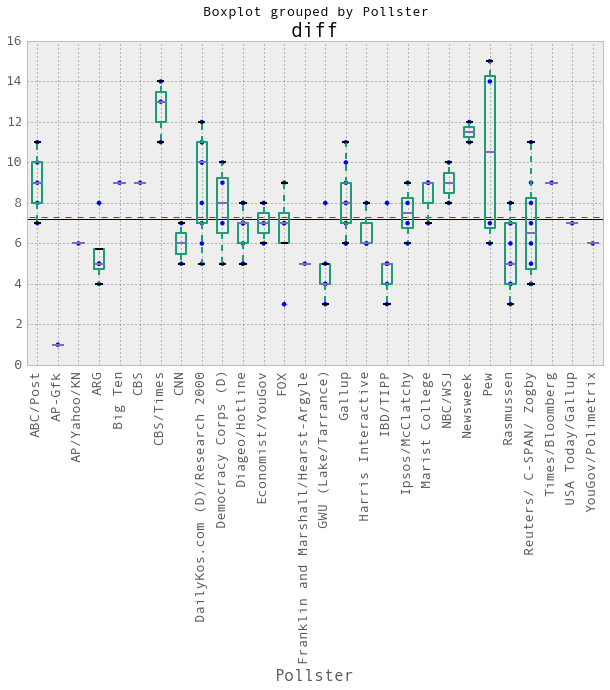

In [79]:
df_polls.boxplot(column = "diff", by = "Pollster")

#get list of the alphabetic order of pollsters
x = list(set(df_polls["Pollster"]))
x.sort()
x = [x.index(poll)+1 for poll in df_polls["Pollster"]]

# plot all points
plt.scatter(y = df_polls["diff"], x = x)

# plot solid line where the actual election result was (7.2) , red line at the average of all polls
plt.hlines(7.2, 0, len(set(df_polls["Pollster"]))+1, lw=1)
plt.hlines(np.mean(df_polls["diff"]), 0, len(set(df_polls["Pollster"]))+1, lw=1, 
           linestyle='--', color='red')
plt.xticks(rotation=90)
plt.show()

The actual difference was 7.2